# Titanic: Machine Learning from Disaster
<h3> Predict survival on the Titanic </h3>
<h4> KwangMyung Yu, Senior Researcher, Korea Electric Power Corporation</h4>

<h3>Problem analysis</h3>

<p> In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.</p><br />
<p> RMS 타이타닉 침몰 사고 시 구명정이 탑승 승객보다 적었기 때문에 일부 사람들만 생존할 수 있었다.<br />
승객 중 어떤 그룹의 사람들은 다른 그룹들보다 생존할 확률이 높았다. ex)여성, 아이들, 상류층<br />
타이타닉호 탑승 승객 데이터를 학습하여 탑승자 정보가 들어왔을 때 생존 혹은 사망할 확률을 예측한다.</p>

문제 해결을 위해 다음의 단계를 거치게 된다.

1. 데이터 셋 확인  
 - 데이터에 Null 값, 이상치 등이 포함되어 있는지 확인한다.  
2. 탐색적 데이터 분석(Expolatory data analysis)  
 - 피쳐(feature) 값의 특성을 분석하고, 서로 간의 상관관계를 확인한다.  
3. 특성공학(Feature engineering)  
 - 머신러닝 모델의 성능을 향상 시키기 위해 데이터를 전처리한다.  
4. 모델 생성, 학습, 튜닝, 그리고 평가
 - 머신러닝 모델을 생성하여 전처리된 train 데이터로 학습시킨다.  
 - 학습된 모델에 test 데이터를 입력하여 생존자를 예측한다.  
 - 모델의 하이퍼 파라미터를 조정하여 어느정도 성능이 향상되었는지 평가한다

## 1. 데이터 셋 확인

- 주피터 노트북이 동작하고 있는 경로에 'data'라는 폴더를 생성하고, 분석에 사용되는 train.csv, test.csv 파일을 저장한다.
- 그리고 분석에 사용되는 라이브러리들을 import 한다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set() # seaborn...
import sklearn

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv') #분석용 데이터를 읽어온다.

- train.csv : 학습에 사용되는 파일
- test.csv : 학습한 모델로 생존자를 예측하기 위해 사용되는 파일

각 데이터 셋의 크기를 확인한다.

In [3]:
train.shape #11개의 피쳐, 1개의 타겟, 891개의 샘플

(891, 12)

In [4]:
test.shape #11개의 피쳐, 타겟 없음, 418개의 샘플

(418, 11)

head() 메서드로 어떤 피쳐 값이 있는지 확인한다.

In [5]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


info() 메서드를 사용하여 각 컬럼 값의 정보를 살펴본다.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


각 피쳐의 자료형과 개수 등을 확인할 수 있다.  
일부 컬럼에는 데이터가 누락된 것도 확인된다.(Age, Cabin, Embarked)

예측해야할 타겟 컬럼은 'Survived'이고, 나머지 컬럼은 피쳐 값이다.

각 피쳐 값에 대한 설명은 다음과 같다.  
- PassengerId(승객번호) : 각 승객을 순번대로 번호를 지정, 정수형  
- Survived(생존여부) : 타겟 라벨, 0 = 사망, 1 = 생존, 정수형  
- Pclass(티켓등급) : 1 = 1등급, 2 = 2등급, 3 = 3등급, 정수형  
- Name(이름) : Object
- Sex(성별) : male = 남성, female = 여성, Object  
- Age(나이) : 실수형
- SibSp(동승한 형제/배우자 수) : 정수형
- Parch(동승한 부모/자녀 수) : 정수형
- Ticket(티켓번호) : Object(알파벳+정수)  
- Fare(티켓요금) : 실수형  
- Cabin(객실번호) : Object(알파벳+정수) 
- Embarked(탑승한 항구) : C = Cherbourg, Q = Queenstown, S = Southampton, Object(문자열)

describe() 메서드를 사용하여 각 컬럼의 통계 정보를 확인한다.  
통계치를 계산하므로 정수형, 실수형 값으로 정의된 컬럼의 정보만 리턴한다.

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


일부 컬럼에서 결측치(Null Data)가 확인된다.

### 1.1 결측 값(Null Data) 확인

train, test 데이터의 컬럼에서 결측값이 차지하는 비중을 확인한다.  
결측값의 비중이 크면 컬럼 전체를 제거한다.
결측값의 비중이 적으면 적절한 값을 삽입한다.

In [9]:
train.isnull().sum() / train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [10]:
test.isnull().sum() / test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

Age 컬럼에 약 20%, Cabin 컬럼에 약 75% 이상의 결측 값이 있다.

### 1.2 타겟 값(Target) 확인

본 데이터에서 타겟 값은 'Survived' 컬럼에 포함되어 있으며, 0(사망) 또는 1(생존) 중에 한가지 값을 가진다.  
따라서 본 문제는 이진분류(Binary Classification) 문제이다.
  
우선 train 데이터에서 타겟 값의 분포가 어떻게 되는지 확인해본다.

In [11]:
train['Survived'].value_counts()/train.shape[0]

0    0.616162
1    0.383838
Name: Survived, dtype: float64

사망자와 생존자의 비가 6:4 정도이다.  
타겟 값이 과도하게 편중된 것은 아니므로 모델 학습에 문제가 없다.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

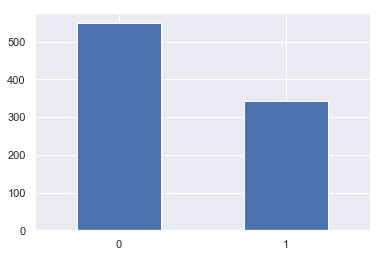

In [12]:
train['Survived'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)

바차트 생성을 통해서도 동일한 결과를 확인할 수있다.

## 2. 탐색적 데이터 분석(Expolatory data analysis)

- 피쳐(컬럼) 별 특성을 살펴본다.
- 데이터 시각화 라이브러리를 사용한다.

### 2.1 Pclass(티켓등급)

- Pclass는 1, 2, 3 중 한가지 값을 가지는 카테고리 데이터이다.
- 그리고 서수형(순서가 있는) 데이터이다.
- 우선 데이터셋에서 Pclass, Survived 컬럼만 인덱싱한다.
- 그리고 Pclass, 즉 티켓등급을 기준으로 데이터를 그룹핑한다.  
(이때, groupby 매서드를 사용한다.)

In [13]:
byPclass = train[['Pclass', 'Survived']].groupby(['Pclass'], 
            as_index = True) #as_index는 디펄트 값임

In [14]:
type(byPclass)

pandas.core.groupby.generic.DataFrameGroupBy

groupby 메서드를 사용한 결과는 DataFrame 형태가 아니다.

byPclass에 count() 메서드를 사용하여 티켓 등급별 승객수를 확인한다.

In [15]:
byPclass.count()

,Survived
Pclass,
1,216
2,184
3,491


1등급 탑승객 : 216명, 2등급 탑승객 : 184명, 3등급 탑승객 : 491명

In [16]:
#byPclass1 = train[train['Pclass']==1][['Pclass', 'Survived']]
#byPclass2 = train[train['Pclass']==2][['Pclass', 'Survived']]
#byPclass3 = train[train['Pclass']==3][['Pclass', 'Survived']]

In [17]:
Num_of_Pclass1 = train[train['Pclass']==1]['Pclass'].count()
Num_of_Pclass2 = train[train['Pclass']==2]['Pclass'].count()
Num_of_Pclass3 = train[train['Pclass']==3]['Pclass'].count()

pd.DataFrame({'Pclass1' : [Num_of_Pclass1], 
              'Pclass2' : [Num_of_Pclass2],
              'Pclass3': [Num_of_Pclass3]}, 
             index = ['Passengers'])

,Pclass1,Pclass2,Pclass3
Passengers,216,184,491


Groupby 메서드를 사용하지 않고 처리할수도 있지만 코드가 길어진다.

byPclass에 sum() 메서드를 사용하여 티켓 등급별 생존자 수를 확인한다.  
('Survived' 컬럼에 사망 0, 생존 1로 기록) 

In [18]:
byPclass.sum()

,Survived
Pclass,
1,136
2,87
3,119


1등급 생존자 : 136명, 2등급 생존자 : 87명, 3등급 생존자 : 119명

byPclass에 sum() 메서드를 사용하면 티켓 등급별 생존율을 확인할 수있다.

In [19]:
# byPclass.sum()/byPclass.count()
byPclass.mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


생존율을 bar chart로 확인한다

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

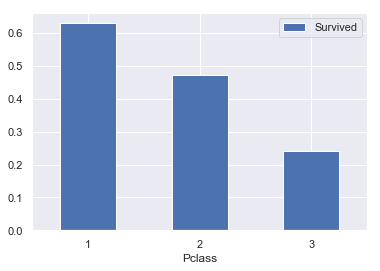

In [20]:
byPclass.mean().plot(kind = 'bar')
plt.xticks(rotation = 0)

정리
- 등급 순서대로 생존율이 낮아지는 규칙성을 확인할 수있다.
- Pclass가 생존에 영향을 미친다고 볼 수 있으므로 피쳐로 사용한다.

### 2.2 Sex(성별)
- Sex는 Female, male 중 한가지 값을 가지는 카테고리 데이터이다.
- 우선 데이터셋에서 Sex, Survived 컬럼만 인덱싱한다.
- 그리고 Sex, 즉 성별을 기준으로 데이터를 그룹핑한다.  
(이때, groupby 매서드를 사용한다.)

In [21]:
bySex = train[['Sex', 'Survived']].groupby(['Sex'], 
            as_index = True) #as_index는 디펄트 값임

In [22]:
bySex.mean()

,Survived
Sex,
female,0.742038
male,0.188908


(array([0, 1]), <a list of 2 Text xticklabel objects>)

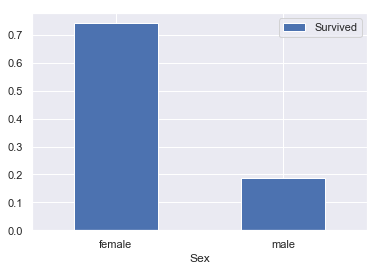

In [23]:
bySex.mean().plot(kind = 'bar')
plt.xticks(rotation = 0)

정리

- 남성보다 여성이 생존율이 높다.
- 성별이 생존율에 영향을 미친다고 볼 수 있으므로 피쳐로 사용한다

### 2.3 Age(나이)
- Age는 정수형 데이터이다.
- 연령대별 생존, 사망 분포를 확인한다.

In [24]:
train['Age'].max()

80.0

In [25]:
train['Age'].min()

0.42

In [26]:
train['Age'].mean()

29.69911764705882

최고령 : 80세, 최연소 : 0.42세, 평균나이 : 29.7세

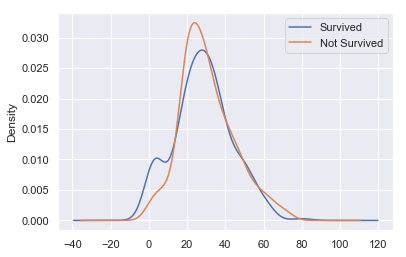

In [27]:
train[train['Survived']==1]['Age'].plot(kind='kde')
train[train['Survived']==0]['Age'].plot(kind='kde')
plt.legend(['Survived', 'Not Survived'])

나이가 어릴수록 생존확률이 높다.

### 2.4 Embarked(탑승항구)
- Embarked는 C, Q, S 중 한가지 값을 가지는 카테고리 데이터이다.
- 우선 데이터셋에서 Embarked, Survived 컬럼만 인덱싱한다.
- 그리고 Embarked, 즉 탑승항구를 기준으로 데이터를 그룹핑한다.  
(이때, groupby 매서드를 사용한다.)

In [28]:
byEmbarked = train[['Embarked', 'Survived']].groupby('Embarked')

In [29]:
byEmbarked.count().sort_values(by = 'Survived',ascending= False)

,Survived
Embarked,
S,644
C,168
Q,77


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

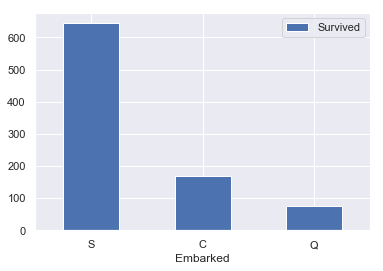

In [30]:
byEmbarked.count().sort_values(by = 'Survived', ascending=False).plot(kind = 'bar')
plt.xticks(rotation = 0)

S(Southampton), C(Cherbourg), Q(Queenstown) 순으로 생존율 이 높다.

In [31]:
# 다른 피쳐와 상관도도 살펴볼것...일단 skip

### 2.5 SibSp(형제 자매)
- 탑승자의 형제 자매 수 SibSp는 정수형 데이터이다.
- 우선 데이터셋에서 SibSp, Survived 컬럼만 인덱싱한다.
- 그리고 SibSp, 즉 형제 자매수를 기준으로 데이터를 그룹핑한다.  
(이때, groupby 매서드를 사용한다.)

In [32]:
bySibSp = train[['SibSp', 'Survived']].groupby('SibSp')

In [33]:
bySibSp.count()

,Survived
SibSp,
0,608
1,209
2,28
3,16
4,18
5,5
8,7


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

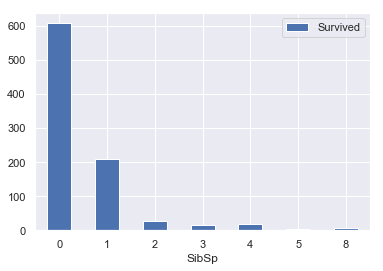

In [34]:
bySibSp.count().plot(kind= 'bar')
plt.xticks(rotation = 0)

형제 자매 수가 많을수록 생존율이 낮다.

### 2.6 Parch(부모 자녀)
- 탑승자의 부모, 자녀 수 Parch는 정수형 데이터이다.
- 우선 데이터셋에서 Parch, Survived 컬럼만 인덱싱한다.
- 그리고 Parch, 즉 부모 자녀 수를 기준으로 데이터를 그룹핑한다.  
(이때, groupby 매서드를 사용한다.)

In [35]:
byParch = train[['Parch', 'Survived']].groupby('Parch')

In [36]:
byParch.count()

,Survived
Parch,
0,678
1,118
2,80
3,5
4,4
5,5
6,1


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

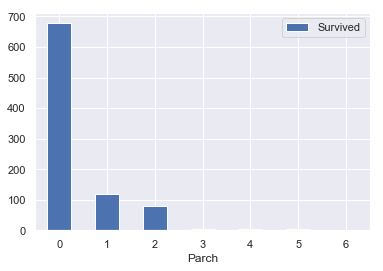

In [37]:
byParch.count().plot(kind = 'bar')
plt.xticks(rotation = 0)

부모, 자녀 수가 많을수록 생존율이 낮다.

### 2.7 Fare(티켓요금)
- 티켓요금 Fare는 실수형 데이터이다.
- 히스토그램으로 분포를 확인한다.

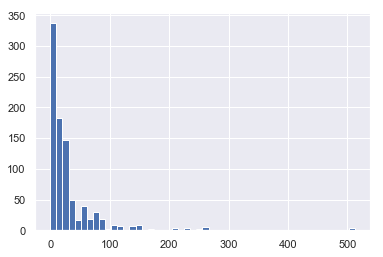

In [38]:
train['Fare'].hist(bins = 50)

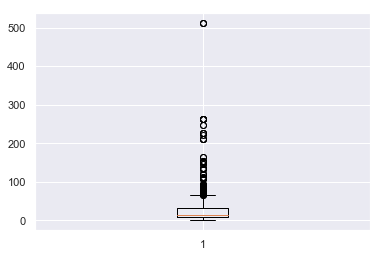

In [39]:
plt.boxplot(train['Fare'])
plt.show()

In [40]:
# 비대칭성, 아웃라이어

### 2.8 Cabin(객실번호)
- 객실번호 Cabin 은 문자와 정수가 혼합된 데이터이다.
- describe 메서드로 살펴본다.

In [41]:
train['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [42]:
train['Cabin'].isnull().sum() / train['Cabin'].shape[0]

0.7710437710437711

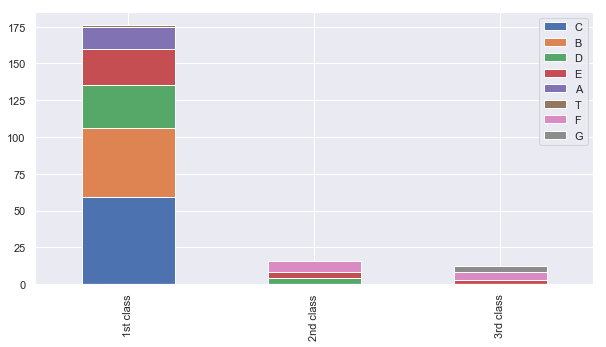

In [43]:
Pclass1 = train[train['Pclass']==1]['Cabin'].str[0].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].str[0].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].str[0].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind = 'bar', stacked=True, figsize=(10, 5))

### 2.9 Ticket(티켓번호)
- 티켓번호 Ticket 은 문자와 정수가 혼합된 데이터이다.
- value_counts() 메서드로 살펴본다

In [44]:
train['Ticket'].value_counts()

CA. 2343            7
1601                7
347082              7
347088              6
3101295             6
CA 2144             6
382652              5
S.O.C. 14879        5
17421               4
4133                4
LINE                4
349909              4
PC 17757            4
347077              4
2666                4
113760              4
W./C. 6608          4
113781              4
19950               4
35273               3
347742              3
239853              3
PC 17582            3
110413              3
C.A. 34651          3
SC/Paris 2123       3
PC 17760            3
13502               3
24160               3
345773              3
                   ..
3411                1
350043              1
350029              1
349251              1
113788              1
8475                1
3101267             1
2700                1
7545                1
239855              1
349242              1
PC 17596            1
347071              1
C 17369             1
341826    

## 3. 특성공학(Feature Engineering)

- 데이터 셋의 결측 값(null data)를 채운다.
- 필요에 따라 연속형(continuous) 데이터를 범주형으로 변환한다.
- 문자열(string) 정보를 수치화 한다.
- 범주형 데이터의 성능 향상을 위해 매핑을 실시한다.
- 불필요한 데이터 열(columns)을 제거한다.

In [45]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [46]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 3.1 결측값 처리
- 각 컬럼별 결측 값을 확인한다.
- 컬럼 데이터의 통계정보나 컬럼 특성을 고려하여, 결측치를 채운다.

In [47]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [48]:
test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

Age, Cabin, Embarked, Fare에서 결측치가 확인된다.

#### 3.1.1 Age 결측치 처리

Age 컬럼의 결측치는 명단의 title 별 나이의 평균으로 대체한다.
우선 Name 컬럼에서 탑승자의 title(Mr., Miss 등)을 추출한다.

In [49]:
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.')
test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.')

Name 컬럼에서 Title을 추출하기 위해 data를 문자열로 바꿔주는 str 메서드와 정규표현식으로 정보를 추출하는 extract 메서드를 사용한다.

([A-Za-z]+)\. : 대소문자 A-Z, a-z까지 1개 이상의 단어에 마침표 .이 붙은 것을 추출

그 결과가 Title 컬럼에 저장된다.

In [50]:
train.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Mme           1
Ms            1
Sir           1
Capt          1
Jonkheer      1
Don           1
Lady          1
Countess      1
Name: Title, dtype: int64

In [51]:
test.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

Mr, Miss, Mrs, Master 정도만 의미가 있다고 판단된다.  나머지 value들은 유추하여 Mr, Miss, Mrs, Master 중 하나로 대체하거나 Other로 통일한다. (캐글 튜터리얼 참고)

In [52]:
train['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

test['Title'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [53]:
train.Title.value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Title, dtype: int64

In [54]:
test.Title.value_counts()

Mr        242
Miss       79
Mrs        72
Master     21
Other       4
Name: Title, dtype: int64

이제 groupby 메서드를 사용하여 Title별 연령 평균은 확인한다.

In [55]:
train.groupby('Title').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Title,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778


Title별 Age 결측치에 평균을 입력한다.

In [56]:
#train[(train.Age.isnull()) & (train.Title == 'Mr')]['Age']=33

위 방법보다 loc을 사용한 인덱싱을 추천하므로 다음과 같이 진행한다.

In [57]:
train.loc[(train.Age.isnull())&(train.Title=='Mr'),'Age'] = 33
train.loc[(train.Age.isnull())&(train.Title=='Mrs'),'Age'] = 36
train.loc[(train.Age.isnull())&(train.Title=='Master'),'Age'] = 5
train.loc[(train.Age.isnull())&(train.Title=='Miss'),'Age'] = 22
train.loc[(train.Age.isnull())&(train.Title=='Other'),'Age'] = 46

test.loc[(test.Age.isnull())&(test.Title=='Mr'),'Age'] = 33
test.loc[(test.Age.isnull())&(test.Title=='Mrs'),'Age'] = 36
test.loc[(test.Age.isnull())&(test.Title=='Master'),'Age'] = 5
test.loc[(test.Age.isnull())&(test.Title=='Miss'),'Age'] = 22
test.loc[(test.Age.isnull())&(test.Title=='Other'),'Age'] = 46

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [60]:
train['Age'] = train['Age'].astype('int64')

In [61]:
test['Age'] = test['Age'].astype('int64')

자료형을 정수형으로 조정하였다.

#### 3.1.2 Embarked 결측치 처리

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null object
dtypes: float64(1), int64(6), object(6)
memory usage: 90.6+ KB


In [63]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 39.3+ KB


In [64]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Embarked에 결측치는 2개뿐이므로, 간단히 S로 채운다.

In [65]:
train.loc[train.Embarked.isnull(),'Embarked'] = 'S'

In [66]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

#### 3.1.3 Fare 결측치 처리

In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 39.3+ KB


테스트 데이터의 결측치 1건을 처리한다.

In [68]:
test['Fare'].head()

0     7.8292
1     7.0000
2     9.6875
3     8.6625
4    12.2875
Name: Fare, dtype: float64

In [69]:
test.loc[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
152,1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S,Mr


결측치가 있는 데이터의 등급(Pclass)는 3이다.
groupby 메서드로 3등급의 중간값으로 결측치를 대체한다.

In [70]:
test.groupby('Pclass').median()

,PassengerId,Age,SibSp,Parch,Fare
Pclass,,,,,
1,1094.0,39.0,0.0,0.0,60.0000
2,1122.0,28.0,0.0,0.0,15.7500
3,1091.5,26.0,0.0,0.0,7.8958


In [71]:
test['Fare'].fillna(test.groupby('Pclass').median().iloc[2, 4], 
                   inplace = True)

In [72]:
test.iloc[152]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                            60
SibSp                           0
Parch                           0
Ticket                       3701
Fare                       7.8958
Cabin                         NaN
Embarked                        S
Title                          Mr
Name: 152, dtype: object

### 3.2 데이터 범주화
- 필요에 따라 연속형 데이터나 문자열 데이터를 범주화 한다.

#### 3.2.1 Age 데이터 범주화

In [73]:
#test.loc[test['Age'] <= 15, 'Age'] = 0,
#test.loc[(test['Age'] > 15) & (test['Age'] <= 30), 'Age'] = 1,
#test.loc[(test['Age'] > 30) & (test['Age'] <= 40), 'Age'] = 2,
#test.loc[(test['Age'] > 40) & (test['Age'] <= 60), 'Age'] = 3,
#test.loc[dataset['Age'] > 60, 'Age'] = 4

먼저 연령을 입력받아 범주를 리턴하는 함수를 만든다.
(캐글 코리아 참고)

In [74]:
def category_age(x):
    if x < 15: #child
        return 0 
    elif x < 30: #youth
        return 1
    elif x < 40: #adult
        return 2
    elif x < 60: #middle-age
        return 3
    else:        #old
        return 4  

In [75]:
train['Age'] = train['Age'].apply(category_age)
test['Age'] = test['Age'].apply(category_age)

In [76]:
train['Age'].value_counts()

1    342
2    304
3    137
0     82
4     26
Name: Age, dtype: int64

In [77]:
test['Age'].value_counts()

1    169
2    132
3     68
0     35
4     14
Name: Age, dtype: int64

Child : 0, Youth : 1, Adult : 2, Midle-age : 3, Old : 4

#### 3.2.2 성별(Sex) 데이터 범주화

남성(male)을 0으로, 여성(female)을 1로 매핑한다.

In [78]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

In [79]:
train.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [80]:
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

참고 : 0, 1로 매핑한것과 one hot 인코딩으로 2개 컬럼 생성한 것의 성능은 같다.

#### 3.2.3 탑승항구(Embarked) 데이터 범주화

S:0, C:1, Q:2로 매핑한다.

In [81]:
train['Embarked'] = train['Embarked'].map({'S': 0, 
                    'C': 1, 'Q': 2})

In [82]:
train['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [83]:
test['Embarked'] = test['Embarked'].map({'S': 0, 
                    'C': 1, 'Q': 2})

#### 3.2.4 Title 데이터 범주화

Mr: 0, Miss: 1, Mrs: 2, Master: 3, Other: 4

In [84]:
train['Title'] = train['Title'].map({'Mr': 0, 'Miss': 1, 
            'Mrs': 2, 'Master': 3, 'Other': 4})

In [85]:
train['Title'].value_counts()

0    529
1    186
2    127
3     40
4      9
Name: Title, dtype: int64

In [86]:
test['Title'] = test['Title'].map({'Mr': 0, 'Miss': 1, 
            'Mrs': 2, 'Master': 3, 'Other': 4})

In [87]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,7.8292,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3,1,0,363272,7.0000,NaN,0,2
2,894,2,"Myles, Mr. Thomas Francis",0,4,0,0,240276,9.6875,NaN,2,0
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,8.6625,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,NaN,0,2
5,897,3,"Svensson, Mr. Johan Cervin",0,0,0,0,7538,9.2250,NaN,0,0
6,898,3,"Connolly, Miss. Kate",1,2,0,0,330972,7.6292,NaN,2,1
7,899,2,"Caldwell, Mr. Albert Francis",0,1,1,1,248738,29.0000,NaN,0,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,1,0,0,2657,7.2292,NaN,1,2
9,901,3,"Davies, Mr. John Samuel",0,1,2,0,A/4 48871,24.1500,NaN,0,0


### 3.3 새로운 특성 만들기
- 컬럼정보 조합을 통해 새로운 특성정보를 도출한다.

#### 3.3.1 Family Size

SibSp(형제 자매)와 Parch(부모, 자녀) 컬럼의 값을 더해 Family Size 컬럼을 생성한다.

In [88]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1 
# 자신을 포함하기 위해 1을 더함
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
# 자신을 포함하기 위해 1을 더함

In [89]:
train['FamilySize'].head()

0    2
1    2
2    1
3    2
4    1
Name: FamilySize, dtype: int64

In [90]:
test['FamilySize'].head()

0    1
1    2
2    1
3    1
4    3
Name: FamilySize, dtype: int64

### 3.4 컬럼 지우기
- 불필요한 컬럼을 지운다.

In [91]:
train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 
               'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 
              'Ticket', 'Cabin'], axis=1, inplace=True)

In [92]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1,7.2500,0,0,2
1,1,1,1,2,71.2833,1,2,2
2,1,3,1,1,7.9250,0,1,1
3,1,1,1,2,53.1000,0,2,2
4,0,3,0,2,8.0500,0,0,1


In [93]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,0,2,7.8292,2,0,1
1,3,1,3,7.0000,0,2,2
2,2,0,4,9.6875,2,0,1
3,3,0,1,8.6625,0,0,1
4,3,1,1,12.2875,0,2,3


### 3.5 인코딩
- Embarked와 Title 컬럼의 데이터는 순서형(ordinal) 데이터가 아닌 명목형(nominal) 데이터이다.  
- 성능향상을 위해 One-hot 인코딩을 실시한다.

In [94]:
train = pd.get_dummies(train, columns=['Embarked'], 
                       prefix='Embarked')
test = pd.get_dummies(test, columns=['Embarked'], 
                      prefix='Embarked')

In [95]:
train = pd.get_dummies(train, columns=['Title'], 
                       prefix='Title')
test = pd.get_dummies(test, columns=['Title'], 
                      prefix='Title')

In [96]:
train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Embarked_0,Embarked_1,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4
0,0,3,0,1,7.2500,2,1,0,0,1,0,0,0,0
1,1,1,1,2,71.2833,2,0,1,0,0,0,1,0,0
2,1,3,1,1,7.9250,1,1,0,0,0,1,0,0,0
3,1,1,1,2,53.1000,2,1,0,0,0,0,1,0,0
4,0,3,0,2,8.0500,1,1,0,0,1,0,0,0,0


In [97]:
test.head()

,Pclass,Sex,Age,Fare,FamilySize,Embarked_0,Embarked_1,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4
0,3,0,2,7.8292,1,0,0,1,1,0,0,0,0
1,3,1,3,7.0000,2,1,0,0,0,0,1,0,0
2,2,0,4,9.6875,1,0,0,1,1,0,0,0,0
3,3,0,1,8.6625,1,1,0,0,1,0,0,0,0
4,3,1,1,12.2875,3,1,0,0,0,0,1,0,0


데이터 전처리가 완료되었다.

In [98]:
train.shape

(891, 14)

In [99]:
test.shape

(418, 13)

### Fare scailing 필요 : 일단 보류

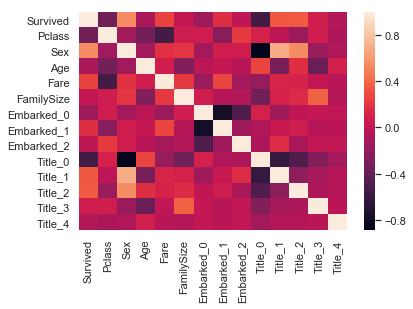

In [100]:
import seaborn as sns
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [101]:
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Survived,Pclass,Sex,Age,Fare,FamilySize,Embarked_0,Embarked_1,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4
Survived,1,-0.338481,0.543351,-0.0910035,0.257307,0.016639,-0.149683,0.16824,0.00365038,-0.550009,0.338468,0.344935,0.0852206,-0.0566492
Pclass,-0.338481,1,-0.1319,-0.319516,-0.5495,0.0659969,0.0740528,-0.243292,0.221009,0.105913,-0.0145657,-0.158279,0.0820814,-0.0776079
Sex,0.543351,-0.1319,1,-0.129779,0.182333,0.200988,-0.119224,0.0828535,0.0741151,-0.886982,0.696282,0.552686,-0.159934,-0.0745185
Age,-0.0910035,-0.319516,-0.129779,1,0.0830046,-0.267105,-0.0110639,0.0326522,-0.0278734,0.268492,-0.305838,0.173606,-0.37662,0.0972621
Fare,0.257307,-0.5495,0.182333,0.0830046,1,0.217138,-0.162184,0.269335,-0.117216,-0.176814,0.121343,0.108496,0.0109084,-0.0266471
FamilySize,0.016639,0.0659969,0.200988,-0.267105,0.217138,1,0.0773585,-0.0462153,-0.0585921,-0.345115,0.105738,0.153525,0.372472,-0.0427463
Embarked_0,-0.149683,0.0740528,-0.119224,-0.0110639,-0.162184,0.0773585,1,-0.782742,-0.499421,0.104714,-0.141356,-0.000564872,0.0242644,0.011934
Embarked_1,0.16824,-0.243292,0.0828535,0.0326522,0.269335,-0.0462153,-0.782742,1,-0.148258,-0.0627686,0.0418606,0.0661013,-0.0352249,-0.0199992
Embarked_2,0.00365038,0.221009,0.0741151,-0.0278734,-0.117216,-0.0585921,-0.499421,-0.148258,1,-0.0790183,0.16635,-0.0911211,0.0104784,0.00887671
Title_0,-0.550009,0.105913,-0.886982,0.268492,-0.176814,-0.345115,0.104714,-0.0627686,-0.0790183,1,-0.62092,-0.492866,-0.262083,-0.122113


In [102]:
corr.style.background_gradient(cmap='coolwarm').set_precision(3)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Survived,Pclass,Sex,Age,Fare,FamilySize,Embarked_0,Embarked_1,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4
Survived,1,-0.338,0.543,-0.091,0.257,0.0166,-0.15,0.168,0.00365,-0.55,0.338,0.345,0.0852,-0.0566
Pclass,-0.338,1,-0.132,-0.32,-0.549,0.066,0.0741,-0.243,0.221,0.106,-0.0146,-0.158,0.0821,-0.0776
Sex,0.543,-0.132,1,-0.13,0.182,0.201,-0.119,0.0829,0.0741,-0.887,0.696,0.553,-0.16,-0.0745
Age,-0.091,-0.32,-0.13,1,0.083,-0.267,-0.0111,0.0327,-0.0279,0.268,-0.306,0.174,-0.377,0.0973
Fare,0.257,-0.549,0.182,0.083,1,0.217,-0.162,0.269,-0.117,-0.177,0.121,0.108,0.0109,-0.0266
FamilySize,0.0166,0.066,0.201,-0.267,0.217,1,0.0774,-0.0462,-0.0586,-0.345,0.106,0.154,0.372,-0.0427
Embarked_0,-0.15,0.0741,-0.119,-0.0111,-0.162,0.0774,1,-0.783,-0.499,0.105,-0.141,-0.000565,0.0243,0.0119
Embarked_1,0.168,-0.243,0.0829,0.0327,0.269,-0.0462,-0.783,1,-0.148,-0.0628,0.0419,0.0661,-0.0352,-0.02
Embarked_2,0.00365,0.221,0.0741,-0.0279,-0.117,-0.0586,-0.499,-0.148,1,-0.079,0.166,-0.0911,0.0105,0.00888
Title_0,-0.55,0.106,-0.887,0.268,-0.177,-0.345,0.105,-0.0628,-0.079,1,-0.621,-0.493,-0.262,-0.122


## 4. 예측모델 구축

### 4.1 머신러닝 모델 성능비교
- 다양한 분류모델을 사용하여 성능을 비교해본다.

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [104]:
X = train.drop('Survived', axis=1)
y = train['Survived']

- LR : Logistic regression
- DT : Decision Tree Classifier
- RF : Random Forest Classifier
- GBC : Gradient Boosting Classifier
- SVC : Support Vector Classifier
  
  모델의 하이퍼 파라미터는 디펄트 값을 그대로 사용한다.

In [105]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
models.append(('SVC', SVC()))
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('DT',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('RF',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=None, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators='warn', n_

In [106]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits = 10, random_state = 7)
    cv_results = cross_val_score(model, X, y, cv=kfold, 
                                 scoring = 'accuracy')
    
    results = np.concatenate((results, cv_results))
    
    #results.append(cv_results)
    names.append(name)

    print('{0:5s}: {1} ({2})'.format(name, cv_results.mean(), 
                                     cv_results.std()))

LR   : 0.8316604244694131 (0.040771639483215986)
DT   : 0.792421972534332 (0.03522051258465929)
RF   : 0.7912858926342072 (0.03602373278852613)
GBC  : 0.8316853932584269 (0.035323812732937936)
SVC  : 0.7979900124843946 (0.022364317963015894)


kfold validation을 통해 성능을 비교한다.  
데이터를 10개로 나누어 검증하였다.

In [107]:
names

['LR', 'DT', 'RF', 'GBC', 'SVC']

In [108]:
results
# 어떤이유인지 모르겠으나 result의 차원이 1차로 되었다.
# reshape 해준다.

array([0.82222222, 0.86516854, 0.78651685, 0.87640449, 0.79775281,
       0.79775281, 0.78651685, 0.80898876, 0.8988764 , 0.87640449,
       0.74444444, 0.80898876, 0.75280899, 0.78651685, 0.83146067,
       0.7752809 , 0.7752809 , 0.76404494, 0.85393258, 0.83146067,
       0.75555556, 0.84269663, 0.74157303, 0.80898876, 0.79775281,
       0.80898876, 0.7752809 , 0.7752809 , 0.75280899, 0.85393258,
       0.8       , 0.85393258, 0.79775281, 0.85393258, 0.85393258,
       0.85393258, 0.83146067, 0.75280899, 0.87640449, 0.84269663,
       0.78888889, 0.7752809 , 0.7752809 , 0.78651685, 0.78651685,
       0.82022472, 0.7752809 , 0.80898876, 0.82022472, 0.84269663])

In [109]:
results = results.reshape(5, 10)
results

array([[0.82222222, 0.86516854, 0.78651685, 0.87640449, 0.79775281,
        0.79775281, 0.78651685, 0.80898876, 0.8988764 , 0.87640449],
       [0.74444444, 0.80898876, 0.75280899, 0.78651685, 0.83146067,
        0.7752809 , 0.7752809 , 0.76404494, 0.85393258, 0.83146067],
       [0.75555556, 0.84269663, 0.74157303, 0.80898876, 0.79775281,
        0.80898876, 0.7752809 , 0.7752809 , 0.75280899, 0.85393258],
       [0.8       , 0.85393258, 0.79775281, 0.85393258, 0.85393258,
        0.85393258, 0.83146067, 0.75280899, 0.87640449, 0.84269663],
       [0.78888889, 0.7752809 , 0.7752809 , 0.78651685, 0.78651685,
        0.82022472, 0.7752809 , 0.80898876, 0.82022472, 0.84269663]])

In [110]:
df = pd.DataFrame(results.reshape(5, 10))
df = df.T

In [111]:
df.columns = names
df

,LR,DT,RF,GBC,SVC
0,0.822222,0.744444,0.755556,0.800000,0.788889
1,0.865169,0.808989,0.842697,0.853933,0.775281
2,0.786517,0.752809,0.741573,0.797753,0.775281
3,0.876404,0.786517,0.808989,0.853933,0.786517
4,0.797753,0.831461,0.797753,0.853933,0.786517
5,0.797753,0.775281,0.808989,0.853933,0.820225
6,0.786517,0.775281,0.775281,0.831461,0.775281
7,0.808989,0.764045,0.775281,0.752809,0.808989
8,0.898876,0.853933,0.752809,0.876404,0.820225
9,0.876404,0.831461,0.853933,0.842697,0.842697


모델별 성능(accuracy)을 DataFrame으로 정리하였다.

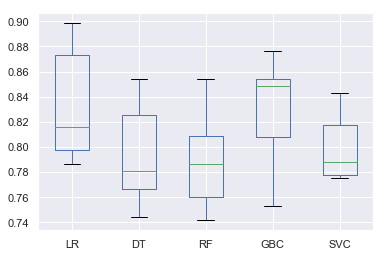

In [112]:
df.boxplot()

정확도 최대 값은 LR(Logistric Regression) 모델에서 발생하였으나 평균적으로 GBC(Gradienc Boosting Classifier)의 성능이 우수하다.  
따라서 GBC 모델을 사용한다.

### 4.2 하이퍼 파라미터 튜닝
#### 4.2.1 Baseline Model
- 하이퍼 파라미터 튜닝에 앞서 Baseline 모델의 성능을 확인한다.

In [113]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import classification_report
# from sklearn.model_selection import GridSearchCV

In [114]:
# baseline_model = GradientBoostingClassifier(learning_rate=0.1,
#                 n_estimators=100, max_depth = 3, min_samples_split=2,
#                 min_samples_leaf=1, subsample=1, max_features='sqrt', 
#                 random_state=7)
# # machine learning mastery에 따르면 위 파라미터를 디펄트로 두는 것이 좋다고 함

In [115]:
# result = cross_val_score(baseline_model, X, y, cv=kfold, 
#                                  scoring = 'accuracy')

In [116]:
# print('GBC: {0} ({1})'.format(result.mean(), result.std()))

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [118]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7, 
                            stratify = y, test_size = 0.3)
# 데이터를 학습용(train)과 시험용(test)으로 나눈다.

In [120]:
model_base = GradientBoostingClassifier(learning_rate=0.1,
                 n_estimators=100, max_depth = 3, min_samples_split=2,
                 min_samples_leaf=1, subsample=1, max_features='sqrt', 
                 random_state=7)
# 문헌에 따르면 위 파라미터를 baseline으로 시작는 것이 좋다고 함
# https://machinelearningmastery.com/configure-gradient-boosting-algorithm

In [121]:
model_base.fit(X_train, y_train) # 학습

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=7,
              subsample=1, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False)

In [122]:
print('Accuracy of the base model on test set: {:.3f}'.format(model_base.score(X_test, y_test)))
pred = model_base.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the base model on test set: 0.854
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       165
           1       0.85      0.76      0.80       103

   micro avg       0.85      0.85      0.85       268
   macro avg       0.85      0.84      0.84       268
weighted avg       0.85      0.85      0.85       268



- 아래부터는 모델의 성능향상을 위해 하이퍼 파라미터를 조정한다.
- GBC 모델의 경우 주요 파라미터는 트리 수(number of trees),  
트리 깊이(tree depth), 학습률(learning rate) 이다.  
- 여기서는 주요 파라미터 뿐 아니라 나머지 파라미터도 조정한다.
- 검증을 위해 10-fold validation 방법을 사용하고, 모델 평가는 정확도(accuracy)를 기준으로 한다.  

#### 4.2.2 n_estimators, learning rate 튜닝
- n_estimators : 모델에 사용되는 트리의 수
- learning_rate : 학습률

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [124]:
model = GradientBoostingClassifier(max_depth = 3, min_samples_split=2,
                min_samples_leaf=1, subsample=1, max_features='sqrt', 
                random_state=7)

n_estimators와 learning_rate를 제외한 나머지 파라미터는 base line 모델의 것을 사용한다.  
pram_grid 변수에 적용할 파라미터 범위를 지정한다.  
최적의 파라미터를 찾기위해 GridSerchCV 라이브러리를 사용한다.

In [125]:
param_grid = {'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001],
             'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500, 1750]}
grid = GridSearchCV(estimator=model, param_grid = param_grid, scoring= 'accuracy',
                   n_jobs=4, cv = 10)
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sam...        subsample=1, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001], 'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500, 1750]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [126]:
grid.best_score_

0.8383838383838383

In [127]:
grid.best_params_

{'learning_rate': 0.15, 'n_estimators': 100}

- Best Score : 0.8383
- Best Parameters : {'learning_rate': 0.15, 'n_estimators': 100}

#### 4.2.3 max_depth 튜닝
- max_depth : 모델에 사용되는 트리의 최대 깊이

In [128]:
model = GradientBoostingClassifier(learning_rate=0.15, n_estimators=100,
                min_samples_split=2, min_samples_leaf=1, subsample=1, 
                max_features='sqrt', random_state=7)

n_estimators와 learning_rate는 앞에서 구한 것을 사용한다.  
나머지 파라미터는 base line 모델의 것을 사용한다.  

In [129]:
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7]}
grid = GridSearchCV(estimator=model, param_grid = param_grid, scoring= 'accuracy',
                   n_jobs=4, cv = 10)
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.15, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sa...        subsample=1, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [130]:
grid.best_score_

0.8383838383838383

In [131]:
grid.best_params_

{'max_depth': 3}

- Best Score : 0.8383
- Best Parameters : {'max_depth': 3}  // 기존과 동일

지금까지 GBC 모델 튜닝에 사용되는 대표 파라미터를 살펴보았다.  
다음부터는 GBC 나머지 파라미터를 조정한다.

#### 4.2.4 min_samples_split and min_samples_leaf 튜닝
- min_samples_split : 구분할 샘플의 최소 개수
- min samples leaf :잎(트리의 끝단)을 구성하는 샘플의 최소 개수

model = GradientBoostingClassifier(learning_rate=0.15, n_estimators=100, max_depth=3,
                subsample=1, max_features='sqrt', random_state=7)

마찬가지로 grid search를 통해 구한 파라미터를 반영한다.   
나머지 파라미터는 base line 모델의 것을 사용한다.

In [132]:
param_grid = {'min_samples_split': [2, 4, 6, 8, 10, 20, 40, 60, 100, 200, 300],
              'min_samples_leaf': [1, 3, 5, 7, 9]}
grid = GridSearchCV(estimator=model, param_grid = param_grid, scoring= 'accuracy',
                   n_jobs=4, cv = 10)
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.15, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sa...        subsample=1, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'min_samples_split': [2, 4, 6, 8, 10, 20, 40, 60, 100, 200, 300], 'min_samples_leaf': [1, 3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [133]:
grid.best_score_

0.8395061728395061

In [134]:
grid.best_params_

{'min_samples_leaf': 3, 'min_samples_split': 100}

- Best Score : 0.8395
- Best Parameters : {'min_samples_leaf': 3, 'min_samples_split': 100}

#### 4.2.5 max_features 튜닝
- max_features : 트리의 가지를 만들 때 고려할 최대 피쳐 수
- 일반적으로 전체 피쳐수의 제곱근('sqrt')을 사용
- 큰 값으로 설정하면 over-fitting을 유발할 수도 있다.(문제에 따라 다름)
- 전체 피쳐수에서 3, 40% 개 까지 살펴볼 필요가 있다.
- 데이터 셋의 피쳐수가 13개이므로 0에서 13까지 범위에서 살펴본다. range(2, 14)

In [135]:
model = GradientBoostingClassifier(learning_rate=0.15, n_estimators=100, max_depth=3,
                min_samples_split=100, min_samples_leaf=3, subsample=1, 
                random_state=7)

In [136]:
param_grid = {'max_features': [i for i in range(2, 14)]}
grid = GridSearchCV(estimator=model, param_grid = param_grid, scoring= 'accuracy',
                   n_jobs=4, cv = 10)
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.15, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=3, min_samp...        subsample=1, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [137]:
grid.best_score_

0.8462401795735129

In [138]:
grid.best_params_

{'max_features': 12}

- Best Score : 0.8462
- Best Parameters : {'max_features': 12}

#### 4.2.6 subsample 튜닝
- subsample : 개별 학습기를 피팅하기위해 사용되는 샘플조각의 set
- 1보다 작은 값은 variance를 감소시키는 것으로 알려져있다.(건전성 향상)

In [139]:
model = GradientBoostingClassifier(learning_rate=0.15, n_estimators=100, max_depth=3,
                min_samples_split=100, min_samples_leaf=3, max_features=12,
                random_state=7)

In [140]:
param_grid = {'subsample': [0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]}
grid = GridSearchCV(estimator=model, param_grid = param_grid, scoring= 'accuracy',
                   n_jobs=4, cv = 10)
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.15, loss='deviance', max_depth=3,
              max_features=12, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=3, min_sample...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'subsample': [0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [141]:
grid.best_score_

0.8529741863075196

In [142]:
grid.best_params_

{'subsample': 0.9}

- Best Score : 0.8529
- Best Parameters : {'subsample': 0.9}

### 4.3.6 최종 모델평가
- 튜닝 결과를 반영하여 모델의 성능을 최종 평가한다.

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [144]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7,
                            stratify = y, test_size = 0.3)

In [146]:
model_GBC = GradientBoostingClassifier(learning_rate=0.15, n_estimators=100, 
                max_depth=3, min_samples_split=100, min_samples_leaf=3, 
                max_features=12, subsample=0.9, random_state=7)

In [147]:
model_GBC.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.15, loss='deviance', max_depth=3,
              max_features=12, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=3, min_samples_split=100,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=7,
              subsample=0.9, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [148]:
print('Accuracy of the GBC on test set: {:.3f}'.format(model_GBC.score(X_test, y_test)))
pred = model_GBC.predict(X_test)
print(classification_report(y_test, pred))

Accuracy of the GBC on test set: 0.847
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       165
           1       0.83      0.76      0.79       103

   micro avg       0.85      0.85      0.85       268
   macro avg       0.84      0.83      0.84       268
weighted avg       0.85      0.85      0.85       268



Base line 모델과 최종 모델과 ROC, AUC를 비교한다.

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [150]:
X = train.drop('Survived', axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 7, 
                            stratify = y, test_size = 0.3)

In [151]:
# Base Line 모델 생성 및 학습
model_base = GradientBoostingClassifier(learning_rate=0.1,
                 n_estimators=100, max_depth = 3, min_samples_split=2,
                 min_samples_leaf=1, subsample=1, max_features='sqrt', 
                 random_state=7)
model_base.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=7,
              subsample=1, tol=0.0001, validation_fraction=0.1, verbose=0,
              warm_start=False)

In [152]:
# Base Line 모델 생성 및 학습
model_GBC = GradientBoostingClassifier(learning_rate=0.15, n_estimators=100, 
                max_depth=3, min_samples_split=100, min_samples_leaf=3, 
                max_features=12, subsample=0.9, random_state=7)
model_GBC.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.15, loss='deviance', max_depth=3,
              max_features=12, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=3, min_samples_split=100,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=7,
              subsample=0.9, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [153]:
# Base Line 모델의 ROC, AUC
base_roc_auc = roc_auc_score(y_test, model_base.predict(X_test))
fprBase, tprBase, thresholdsBase = roc_curve(y_test, 
                          model_base.predict_proba(X_test)[:,1])

In [154]:
# GBC 모델의 ROC, AUC
GBC_roc_auc = roc_auc_score(y_test, model_GBC.predict(X_test))
fprGBC, tprGBC, thresholdsGBC = roc_curve(y_test, 
                          model_GBC.predict_proba(X_test)[:,1])

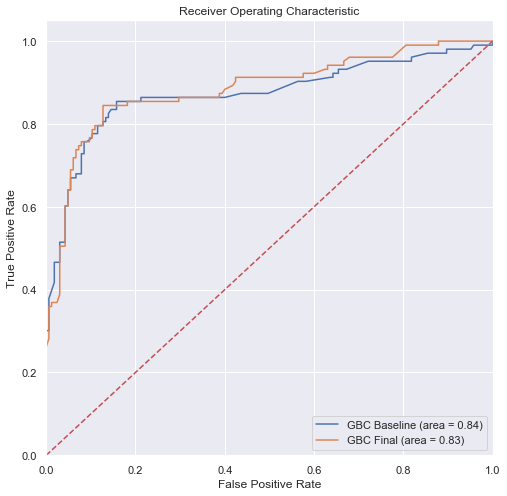

In [155]:
plt.figure(figsize=(8, 8))
plt.plot(fprBase, tprBase, label= 'GBC Baseline (area = %0.2f)' % base_roc_auc)
plt.plot(fprGBC, tprGBC, label= 'GBC Final (area = %0.2f)' % GBC_roc_auc)

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.show()